
# US - Mexico Level 2 Contiguity

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import libpysal
from libpysal.weights import Queen, Rook

In [2]:
old = gpd.read_parquet("../../geoplanar/datasets/usmex/usmex_2.parquet")
new = gpd.read_parquet("../../geoplanar/datasets/usmex/final_usmex2.parquet") 

# Checking for contiguity 

# Rook contiguity

In [3]:
old_rook = Rook.from_dataframe(old) # creating our old rook df

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))
/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 4 islands with ids: 1187, 

In [4]:
old_rook.n

5574

In [5]:
new_rook = Rook.from_dataframe(new) # creating our new rook df

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1842, 2953.
  warnings.warn(message)


In [6]:
new_rook.n

5574

### non-zero entries


In [7]:
old_rook.nonzero

31670

In [8]:
new_rook.nonzero

31784

### number of joins


In [9]:
old_rook.s0

31670.0

In [10]:
new_rook.s0

31784.0

### measure of the density of the spatial weights matrix


In [11]:
old_rook.pct_nonzero

0.10193284238202151

In [12]:
new_rook.pct_nonzero

0.10229976199148

### location 0 has the following neighbors


In [13]:
old_rook.neighbors[0] 

[50, 42, 23, 25, 10]

In [14]:
new_rook.neighbors[0]

[50, 42, 23, 25, 10]

### neighbors for each observation


In [15]:
old_rook.neighbors # old df

{0: [50, 42, 23, 25, 10],
 1: [48, 49, 64, 306, 26, 12],
 2: [33, 387, 5, 485, 54, 22, 56, 475],
 3: [32, 10, 36, 52, 58, 62],
 4: [36, 21, 57, 27, 63, 47],
 5: [2, 50, 54, 56, 43],
 6: [17, 49, 19, 20, 65, 42],
 7: [9, 27, 60, 14, 57],
 8: [498, 55, 40, 61, 429],
 9: [384, 414, 7, 472, 24, 27, 14],
 10: [0, 18, 3, 52, 23, 25, 58],
 11: [64, 1410, 1384, 1449, 59, 12, 45],
 12: [64, 1, 49, 65, 11, 45],
 13: [18, 55, 60, 61, 14],
 14: [7, 9, 428, 13, 55, 472, 379, 60],
 15: [19, 20, 54, 22, 30],
 16: [1443, 29, 38, 39],
 17: [49, 26, 19, 6],
 18: [61, 58, 25, 10, 60, 13],
 19: [356, 6, 15, 336, 17, 20, 26, 30],
 20: [50, 19, 6, 54, 42, 15],
 21: [66, 51, 4, 39, 47, 63],
 22: [33, 2, 34, 54, 30, 15],
 23: [0, 65, 10, 52, 42, 45],
 24: [384, 35, 503, 9, 27, 398, 47],
 25: [0, 18, 50, 10, 43, 61],
 26: [336, 1, 17, 49, 19, 306, 347],
 27: [4, 7, 24, 9, 57, 47],
 28: [37, 53, 46, 62, 63],
 29: [16, 66, 1443, 39, 1401, 46],
 30: [321, 34, 19, 356, 319, 22, 15],
 31: [32, 53, 59, 45, 62],
 32:

In [16]:
new_rook.neighbors # new df

{0: [50, 42, 23, 25, 10],
 1: [48, 49, 64, 306, 26, 12],
 2: [33, 387, 5, 485, 54, 22, 56, 475],
 3: [32, 10, 36, 52, 58, 62],
 4: [36, 21, 57, 27, 63, 47],
 5: [2, 50, 54, 56, 43],
 6: [17, 49, 19, 20, 65, 42],
 7: [9, 27, 60, 14, 57],
 8: [498, 55, 40, 61, 429],
 9: [384, 414, 7, 472, 24, 27, 14],
 10: [0, 18, 3, 52, 23, 25, 58],
 11: [64, 1410, 1384, 1449, 59, 12, 45],
 12: [64, 1, 49, 65, 11, 45],
 13: [18, 55, 60, 61, 14],
 14: [7, 9, 428, 13, 55, 472, 379, 60],
 15: [19, 20, 54, 22, 30],
 16: [1443, 29, 38, 39],
 17: [49, 26, 19, 6],
 18: [61, 58, 25, 10, 60, 13],
 19: [356, 6, 15, 336, 17, 20, 26, 30],
 20: [50, 19, 6, 54, 42, 15],
 21: [66, 51, 4, 39, 47, 63],
 22: [33, 2, 34, 54, 30, 15],
 23: [0, 65, 10, 52, 42, 45],
 24: [384, 35, 503, 9, 27, 398, 47],
 25: [0, 18, 50, 10, 43, 61],
 26: [336, 1, 17, 49, 19, 306, 347],
 27: [4, 7, 24, 9, 57, 47],
 28: [37, 53, 46, 62, 63],
 29: [16, 66, 1443, 39, 1401, 46],
 30: [321, 34, 19, 356, 319, 22, 15],
 31: [32, 53, 59, 45, 62],
 32:

### full neighbor matrix


In [17]:
pd.DataFrame(*old_rook.full()).astype(int) # old rook df

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# newrook df
pd.DataFrame(*new_rook.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### weight values


In [19]:
old_rook.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [

In [20]:
new_rook.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [

### number of neighbors for each observation


In [21]:
old_rook.cardinalities

{0: 5,
 1: 6,
 2: 8,
 3: 6,
 4: 6,
 5: 5,
 6: 6,
 7: 5,
 8: 5,
 9: 7,
 10: 7,
 11: 7,
 12: 6,
 13: 5,
 14: 8,
 15: 5,
 16: 4,
 17: 4,
 18: 6,
 19: 8,
 20: 6,
 21: 6,
 22: 6,
 23: 6,
 24: 7,
 25: 6,
 26: 7,
 27: 6,
 28: 5,
 29: 6,
 30: 7,
 31: 5,
 32: 5,
 33: 5,
 34: 6,
 35: 6,
 36: 6,
 37: 5,
 38: 8,
 39: 7,
 40: 6,
 41: 6,
 42: 6,
 43: 6,
 44: 6,
 45: 8,
 46: 7,
 47: 7,
 48: 5,
 49: 6,
 50: 7,
 51: 5,
 52: 5,
 53: 7,
 54: 6,
 55: 7,
 56: 7,
 57: 6,
 58: 6,
 59: 7,
 60: 6,
 61: 7,
 62: 7,
 63: 7,
 64: 6,
 65: 6,
 66: 5,
 67: 8,
 68: 5,
 69: 6,
 70: 6,
 71: 7,
 72: 6,
 73: 7,
 74: 6,
 75: 8,
 76: 5,
 77: 6,
 78: 4,
 79: 2,
 80: 5,
 81: 4,
 82: 7,
 83: 5,
 84: 6,
 85: 7,
 86: 5,
 87: 5,
 88: 5,
 89: 7,
 90: 9,
 91: 6,
 92: 5,
 93: 5,
 94: 7,
 95: 6,
 96: 5,
 97: 6,
 98: 6,
 99: 9,
 100: 5,
 101: 6,
 102: 6,
 103: 6,
 104: 7,
 105: 5,
 106: 6,
 107: 5,
 108: 6,
 109: 5,
 110: 6,
 111: 6,
 112: 4,
 113: 7,
 114: 5,
 115: 7,
 116: 6,
 117: 5,
 118: 6,
 119: 6,
 120: 5,
 121: 5,
 122: 5,
 12

In [22]:
new_rook.cardinalities

{0: 5,
 1: 6,
 2: 8,
 3: 6,
 4: 6,
 5: 5,
 6: 6,
 7: 5,
 8: 5,
 9: 7,
 10: 7,
 11: 7,
 12: 6,
 13: 5,
 14: 8,
 15: 5,
 16: 4,
 17: 4,
 18: 6,
 19: 8,
 20: 6,
 21: 6,
 22: 6,
 23: 6,
 24: 7,
 25: 6,
 26: 7,
 27: 6,
 28: 5,
 29: 6,
 30: 7,
 31: 5,
 32: 5,
 33: 5,
 34: 6,
 35: 6,
 36: 6,
 37: 5,
 38: 8,
 39: 7,
 40: 6,
 41: 6,
 42: 6,
 43: 6,
 44: 6,
 45: 8,
 46: 7,
 47: 7,
 48: 5,
 49: 6,
 50: 7,
 51: 5,
 52: 5,
 53: 7,
 54: 6,
 55: 7,
 56: 7,
 57: 6,
 58: 6,
 59: 7,
 60: 6,
 61: 7,
 62: 7,
 63: 7,
 64: 6,
 65: 6,
 66: 5,
 67: 8,
 68: 8,
 69: 6,
 70: 6,
 71: 7,
 72: 6,
 73: 7,
 74: 6,
 75: 8,
 76: 5,
 77: 13,
 78: 4,
 79: 5,
 80: 5,
 81: 5,
 82: 7,
 83: 5,
 84: 6,
 85: 7,
 86: 5,
 87: 5,
 88: 5,
 89: 7,
 90: 9,
 91: 6,
 92: 5,
 93: 5,
 94: 7,
 95: 6,
 96: 5,
 97: 6,
 98: 6,
 99: 9,
 100: 5,
 101: 6,
 102: 6,
 103: 6,
 104: 7,
 105: 5,
 106: 6,
 107: 5,
 108: 6,
 109: 5,
 110: 6,
 111: 6,
 112: 4,
 113: 7,
 114: 5,
 115: 7,
 116: 6,
 117: 5,
 118: 6,
 119: 6,
 120: 5,
 121: 5,
 122: 5,
 1

### overview of the distribution of the cardinalities
The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

In [23]:
old_rook.histogram

[(0, 4),
 (1, 34),
 (2, 115),
 (3, 316),
 (4, 766),
 (5, 1374),
 (6, 1489),
 (7, 821),
 (8, 377),
 (9, 154),
 (10, 59),
 (11, 26),
 (12, 13),
 (13, 8),
 (14, 4),
 (15, 5),
 (16, 2),
 (17, 1),
 (18, 0),
 (19, 1),
 (20, 2),
 (21, 1),
 (22, 1),
 (23, 1)]

In [24]:
new_rook.histogram

[(0, 4),
 (1, 33),
 (2, 108),
 (3, 308),
 (4, 754),
 (5, 1381),
 (6, 1491),
 (7, 831),
 (8, 381),
 (9, 156),
 (10, 60),
 (11, 27),
 (12, 13),
 (13, 9),
 (14, 4),
 (15, 5),
 (16, 2),
 (17, 1),
 (18, 0),
 (19, 1),
 (20, 2),
 (21, 1),
 (22, 1),
 (23, 1)]

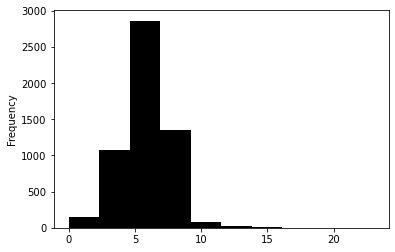

In [25]:
pd.Series(old_rook.cardinalities).plot.hist(color='k');

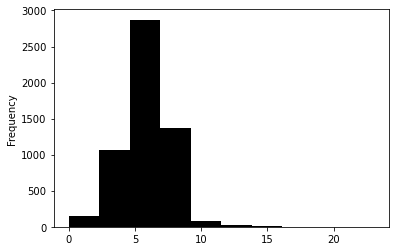

In [26]:
pd.Series(new_rook.cardinalities).plot.hist(color='k');

<AxesSubplot:ylabel='Frequency'>

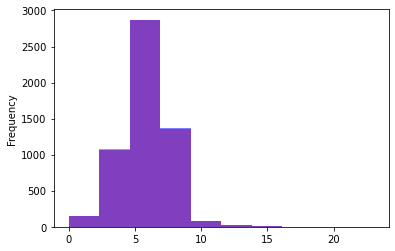

In [27]:
pd.Series(old_rook.cardinalities).plot.hist(color='r', alpha=0.5)
pd.Series(new_rook.cardinalities).plot.hist(color='b', alpha=.5)  

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

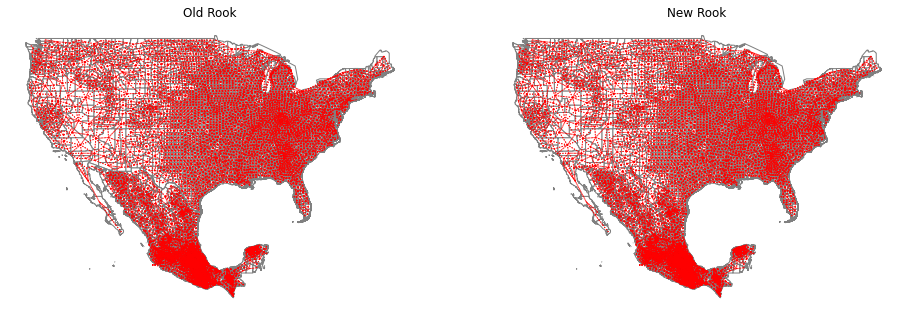

In [29]:
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
old.plot(edgecolor='grey', facecolor='w', ax=ax[0])
old_rook.plot(old, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Old Rook')

ax[0].axis('off')
new.plot(edgecolor='grey', facecolor='w', ax=ax[1])
new_rook.plot(new, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('New Rook')

# remove the axis
ax[1].set_axis_off()

# Queen Contiguity

In [30]:
old_queen = Queen.from_dataframe(old) # creating our old queen df

In [31]:
old_queen.n

5574

In [32]:
new_queen = Queen.from_dataframe(new) # creating our new queen df

In [33]:
new_queen.n

5574

In [34]:
old_queen.n == old_rook.n

True

In [35]:
new_queen.n == new_rook.n

True

### non-zero entries


In [36]:
old_queen.nonzero

32742

In [37]:
new_queen.nonzero

32862

### number of joins


In [38]:
old_queen.s0

32742.0

In [39]:
new_queen.s0

32862.0

### measure of the density of the spatial weights matrix


In [40]:
old_queen.pct_nonzero

0.10538317414815751

In [41]:
new_queen.pct_nonzero

0.10576940531600855

### location 0 has the following neighbors


In [42]:
old_queen.neighbors[0]

[50, 10, 23, 25, 42]

In [43]:
new_queen.neighbors[0]

[50, 10, 23, 25, 42]

### neighbors for each observation


In [44]:
old_queen.neighbors

{0: [50, 10, 23, 25, 42],
 1: [48, 49, 64, 306, 26, 12],
 2: [33, 387, 5, 485, 54, 22, 56, 475],
 3: [32, 36, 52, 58, 10, 62],
 4: [36, 21, 57, 27, 47, 63],
 5: [2, 50, 54, 56, 43],
 6: [65, 17, 49, 19, 20, 42],
 7: [9, 27, 60, 14, 57],
 8: [498, 55, 40, 61, 429],
 9: [384, 414, 7, 472, 24, 27, 14],
 10: [0, 18, 3, 52, 23, 25, 58],
 11: [64, 1410, 1384, 1449, 59, 12, 45],
 12: [64, 1, 65, 49, 11, 45],
 13: [18, 55, 60, 61, 14],
 14: [7, 9, 428, 13, 55, 472, 379, 60],
 15: [19, 20, 54, 22, 30],
 16: [1443, 29, 38, 39],
 17: [49, 26, 19, 6],
 18: [13, 10, 25, 58, 60, 61],
 19: [356, 6, 15, 336, 17, 20, 26, 30],
 20: [50, 19, 6, 54, 42, 15],
 21: [66, 51, 4, 39, 47, 63],
 22: [33, 2, 34, 54, 30, 15],
 23: [0, 65, 10, 52, 42, 45],
 24: [384, 35, 503, 9, 27, 398, 47],
 25: [0, 50, 18, 10, 43, 61],
 26: [336, 1, 49, 306, 17, 19, 347],
 27: [4, 7, 24, 9, 47, 57],
 28: [53, 37, 46, 62, 63],
 29: [16, 66, 1443, 39, 1401, 46],
 30: [321, 34, 19, 356, 319, 22, 15],
 31: [32, 53, 59, 45, 62],
 32:

In [45]:
new_queen.neighbors

{0: [50, 10, 23, 25, 42],
 1: [48, 49, 64, 306, 26, 12],
 2: [33, 387, 5, 485, 54, 22, 56, 475],
 3: [32, 36, 52, 58, 10, 62],
 4: [36, 21, 57, 27, 63, 47],
 5: [2, 50, 54, 56, 43],
 6: [65, 17, 49, 19, 20, 42],
 7: [9, 27, 60, 14, 57],
 8: [498, 55, 40, 61, 429],
 9: [384, 414, 7, 472, 24, 27, 14],
 10: [0, 18, 3, 52, 23, 25, 58],
 11: [64, 1410, 1384, 1449, 59, 12, 45],
 12: [64, 1, 65, 49, 11, 45],
 13: [18, 55, 60, 61, 14],
 14: [7, 9, 428, 13, 55, 472, 379, 60],
 15: [19, 20, 54, 22, 30],
 16: [1443, 29, 38, 39],
 17: [49, 26, 19, 6],
 18: [61, 58, 25, 10, 60, 13],
 19: [356, 6, 15, 336, 17, 20, 26, 30],
 20: [50, 19, 6, 54, 42, 15],
 21: [66, 51, 4, 39, 47, 63],
 22: [33, 2, 34, 54, 30, 15],
 23: [0, 65, 10, 52, 42, 45],
 24: [384, 35, 503, 9, 27, 398, 47],
 25: [0, 50, 18, 10, 43, 61],
 26: [336, 1, 49, 306, 17, 19, 347],
 27: [4, 7, 24, 9, 47, 57],
 28: [37, 53, 46, 62, 63],
 29: [16, 66, 1443, 39, 1401, 46],
 30: [321, 34, 19, 356, 319, 22, 15],
 31: [32, 53, 59, 45, 62],
 32:

### full neighbor matrix


In [46]:
pd.DataFrame(*old_queen.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
pd.DataFrame(*new_queen.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### weight values


In [48]:
old_queen.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [

In [49]:
new_queen.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [

### number of neighbors for each observation


In [50]:
old_queen.cardinalities

{0: 5,
 1: 6,
 2: 8,
 3: 6,
 4: 6,
 5: 5,
 6: 6,
 7: 5,
 8: 5,
 9: 7,
 10: 7,
 11: 7,
 12: 6,
 13: 5,
 14: 8,
 15: 5,
 16: 4,
 17: 4,
 18: 6,
 19: 8,
 20: 6,
 21: 6,
 22: 6,
 23: 6,
 24: 7,
 25: 6,
 26: 7,
 27: 6,
 28: 5,
 29: 6,
 30: 7,
 31: 5,
 32: 5,
 33: 5,
 34: 6,
 35: 6,
 36: 6,
 37: 5,
 38: 8,
 39: 7,
 40: 6,
 41: 6,
 42: 6,
 43: 6,
 44: 6,
 45: 8,
 46: 7,
 47: 7,
 48: 5,
 49: 6,
 50: 7,
 51: 5,
 52: 5,
 53: 7,
 54: 6,
 55: 7,
 56: 7,
 57: 6,
 58: 6,
 59: 7,
 60: 6,
 61: 7,
 62: 7,
 63: 7,
 64: 6,
 65: 6,
 66: 5,
 67: 9,
 68: 5,
 69: 6,
 70: 6,
 71: 7,
 72: 6,
 73: 7,
 74: 6,
 75: 8,
 76: 5,
 77: 6,
 78: 4,
 79: 2,
 80: 5,
 81: 4,
 82: 7,
 83: 6,
 84: 6,
 85: 7,
 86: 5,
 87: 5,
 88: 5,
 89: 7,
 90: 9,
 91: 6,
 92: 5,
 93: 5,
 94: 7,
 95: 6,
 96: 5,
 97: 6,
 98: 6,
 99: 9,
 100: 5,
 101: 6,
 102: 7,
 103: 6,
 104: 7,
 105: 5,
 106: 6,
 107: 5,
 108: 6,
 109: 5,
 110: 7,
 111: 6,
 112: 6,
 113: 7,
 114: 5,
 115: 7,
 116: 6,
 117: 5,
 118: 7,
 119: 6,
 120: 5,
 121: 5,
 122: 6,
 12

In [51]:
new_queen.cardinalities

{0: 5,
 1: 6,
 2: 8,
 3: 6,
 4: 6,
 5: 5,
 6: 6,
 7: 5,
 8: 5,
 9: 7,
 10: 7,
 11: 7,
 12: 6,
 13: 5,
 14: 8,
 15: 5,
 16: 4,
 17: 4,
 18: 6,
 19: 8,
 20: 6,
 21: 6,
 22: 6,
 23: 6,
 24: 7,
 25: 6,
 26: 7,
 27: 6,
 28: 5,
 29: 6,
 30: 7,
 31: 5,
 32: 5,
 33: 5,
 34: 6,
 35: 6,
 36: 6,
 37: 5,
 38: 8,
 39: 7,
 40: 6,
 41: 6,
 42: 6,
 43: 6,
 44: 6,
 45: 8,
 46: 7,
 47: 7,
 48: 5,
 49: 6,
 50: 7,
 51: 5,
 52: 5,
 53: 7,
 54: 6,
 55: 7,
 56: 7,
 57: 6,
 58: 6,
 59: 7,
 60: 6,
 61: 7,
 62: 7,
 63: 7,
 64: 6,
 65: 6,
 66: 5,
 67: 9,
 68: 8,
 69: 6,
 70: 6,
 71: 7,
 72: 6,
 73: 7,
 74: 6,
 75: 8,
 76: 5,
 77: 13,
 78: 4,
 79: 5,
 80: 5,
 81: 5,
 82: 7,
 83: 6,
 84: 6,
 85: 7,
 86: 5,
 87: 5,
 88: 5,
 89: 7,
 90: 9,
 91: 6,
 92: 5,
 93: 5,
 94: 7,
 95: 6,
 96: 5,
 97: 6,
 98: 6,
 99: 9,
 100: 5,
 101: 6,
 102: 7,
 103: 6,
 104: 7,
 105: 5,
 106: 6,
 107: 5,
 108: 6,
 109: 5,
 110: 7,
 111: 6,
 112: 6,
 113: 7,
 114: 5,
 115: 7,
 116: 6,
 117: 5,
 118: 7,
 119: 6,
 120: 5,
 121: 5,
 122: 6,
 1

### overview of the distribution of the cardinalities
The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

In [52]:
old_queen.histogram

[(0, 4),
 (1, 34),
 (2, 108),
 (3, 292),
 (4, 651),
 (5, 1163),
 (6, 1530),
 (7, 1009),
 (8, 455),
 (9, 193),
 (10, 62),
 (11, 30),
 (12, 15),
 (13, 7),
 (14, 5),
 (15, 5),
 (16, 4),
 (17, 1),
 (18, 0),
 (19, 1),
 (20, 1),
 (21, 0),
 (22, 3),
 (23, 0),
 (24, 0),
 (25, 1)]

In [53]:
new_queen.histogram

[(0, 4),
 (1, 33),
 (2, 102),
 (3, 283),
 (4, 641),
 (5, 1165),
 (6, 1533),
 (7, 1021),
 (8, 456),
 (9, 198),
 (10, 63),
 (11, 30),
 (12, 16),
 (13, 8),
 (14, 5),
 (15, 5),
 (16, 4),
 (17, 1),
 (18, 0),
 (19, 1),
 (20, 1),
 (21, 0),
 (22, 3),
 (23, 0),
 (24, 0),
 (25, 1)]

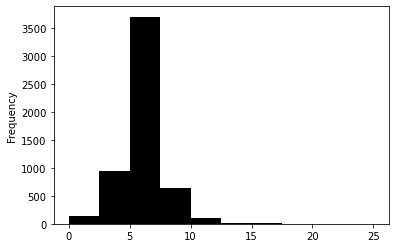

In [54]:
pd.Series(old_queen.cardinalities).plot.hist(color='k');

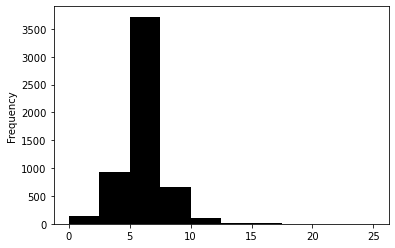

In [55]:
pd.Series(new_queen.cardinalities).plot.hist(color='k');

<AxesSubplot:ylabel='Frequency'>

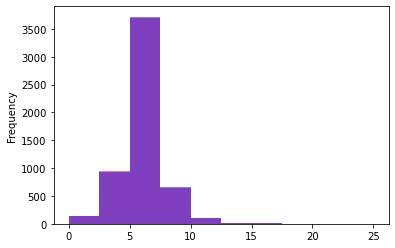

In [56]:
pd.Series(old_queen.cardinalities).plot.hist(color='r', alpha=0.5)
pd.Series(new_queen.cardinalities).plot.hist(color='b', alpha=.5)  

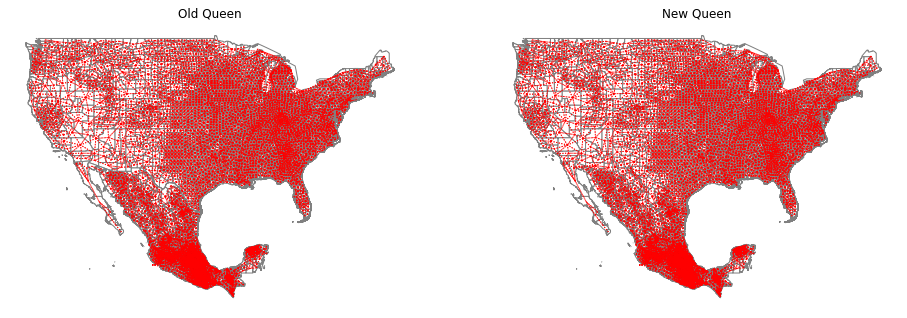

In [57]:
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
old.plot(edgecolor='grey', facecolor='w', ax=ax[0])
old_queen.plot(old, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Old Queen')

ax[0].axis('off')
new.plot(edgecolor='grey', facecolor='w', ax=ax[1])
new_queen.plot(new, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('New Queen')

# remove the axis
ax[1].set_axis_off()

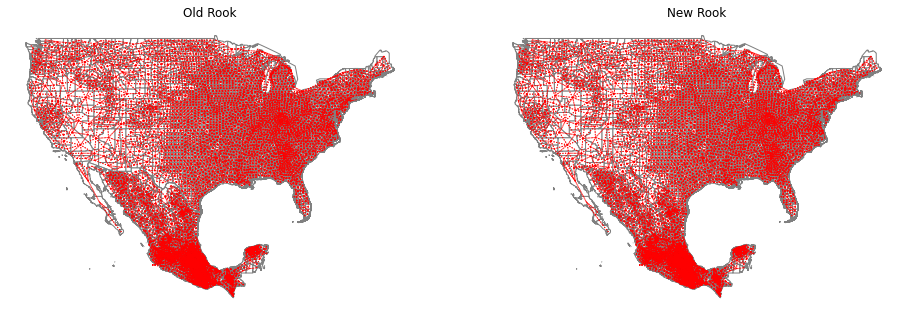

In [58]:
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
old.plot(edgecolor='grey', facecolor='w', ax=ax[0])
old_rook.plot(old, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Old Rook')

ax[0].axis('off')
new.plot(edgecolor='grey', facecolor='w', ax=ax[1])
new_rook.plot(new, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('New Rook')

# remove the axis
ax[1].set_axis_off()